# Basic Placekey Functionality

### Install and load the Placekey library

If placekey is not installed on your system you can install it and other dependencies for the notebooks in this repo by running
```
pip install -r requirements.txt
```

or from a notebook run
```
!pip install placekey folium shapely geopandas numpy awscli
```

In [1]:
import placekey as pk
import h3 as h3

### Conversion between Placekeys and latitude and longitude

The most basic functionality of the library is converting between Placekeys and latitude/longitude

In [2]:
geo = (37.779351, -122.418655)  # The front door of SF City Hall

placekey = pk.geo_to_placekey(*geo)
print('The Placekey for the location of SF City Hall is "{}".'.format(placekey))

centroid_lat, centroid_long = pk.placekey_to_geo(placekey)
print('The latitude and longitude for the center of "{}" is ({}, {}).'.format(placekey, centroid_lat, centroid_long))

The Placekey for the location of SF City Hall is "@5vg-7gq-tjv".
The latitude and longitude for the center of "@5vg-7gq-tjv" is (37.77988951810222, -122.41864762076004).


### Conversion between Placekeys and H3 indices

Since the location portion (Where Part) of a Placekey is based on H3, there are also functions for converting back and forth between Plackeys and H3 indices. These H3 indices are always resolution 10. There is also support for working with integer representation of H3 indices as well as the string representation.

In [3]:
h3_for_placekey = pk.placekey_to_h3(placekey)
print('The H3 index corresponding to "{}" is "{}".'.format(placekey, h3_for_placekey))
print('"{}" has resolution {}.'.format(h3_for_placekey, h3.h3_get_resolution(h3_for_placekey)))

h3_int_for_placekey = pk.placekey_to_h3_int(placekey)
print('The integer H3 index corresponding to "{}" is {}.'.format(placekey, h3_int_for_placekey))

The H3 index corresponding to "@5vg-7gq-tjv" is "8a2830828747fff".
"8a2830828747fff" has resolution 10.
The integer H3 index corresponding to "@5vg-7gq-tjv" is 622203769592250367.


## Converting Placekeys to spatial geometry formats

Often when working with Placekeys it is useful to be able to visualize the corresponding hexagon or to operate with that hexagon and other spatial geometries. To that end we've provided funtionality to convert placekeys into several formats for specifying geometric shapes:
1. Hexagon boundary coordinates,
2. WKT (Weel-Known Text) string for the hexagon boundary,
3. GeoJSON dictionary for the hexagon boundary,
4. Shapely Polygon object for the hexagon boundary.

There are also functions for converting geometric shapes in these formats into lists of Placekeys. See the [advanced functionality notebook]() for examples 

In [4]:
pk.placekey_to_hex_boundary(placekey)

((37.77921928451977, -122.41844077039543),
 (37.77972548542876, -122.41780166521563),
 (37.78039571852498, -122.41800851332172),
 (37.780559746916104, -122.41885447351558),
 (37.78005354361958, -122.41949357434298),
 (37.77938331431949, -122.41928671932915))

In [5]:
pk.placekey_to_wkt(placekey)

'POLYGON ((37.77921928451977 -122.4184407703954, 37.77938331431949 -122.4192867193292, 37.78005354361958 -122.419493574343, 37.7805597469161 -122.4188544735156, 37.78039571852498 -122.4180085133217, 37.77972548542876 -122.4178016652156, 37.77921928451977 -122.4184407703954))'

In [6]:
pk.placekey_to_geojson(placekey)

{'type': 'Polygon',
 'coordinates': (((-122.41844077039543, 37.77921928451977),
   (-122.41780166521563, 37.77972548542876),
   (-122.41800851332172, 37.78039571852498),
   (-122.41885447351558, 37.780559746916104),
   (-122.41949357434298, 37.78005354361958),
   (-122.41928671932915, 37.77938331431949),
   (-122.41844077039543, 37.77921928451977)),)}

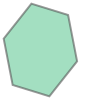

In [7]:
pk.placekey_to_polygon(placekey)